<a href="https://colab.research.google.com/github/kucsmskim/school-meal-crawler/blob/master/for_you.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고려대학교 학식을 웹 크롤링으로 가져와보자!

**구글 아이디 필요**

**필요한 package들을 설치**

In [0]:
!pip install requests
!pip install beautifulsoup4

**필요한 package들을 import**

In [0]:
import requests
from bs4 import BeautifulSoup

**크롤링 할 웹페이지 url**

In [0]:
url = 'https://www.koreapas.com/bbs/sik.php?back=1'
print(url)

https://www.koreapas.com/bbs/sik.php?back=1


**위 url에 request를 보냄(get 방식)**

In [0]:
source_code = requests.get(url)
print(source_code)

<Response [200]>


**해당 url의 소스 코드를 html변수에 저장**

b'<!DOCTYPE html> \r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" xml:lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\r\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\r\n<meta http-equiv="Content-Style-Type" content="text/css" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<META http-equiv="Expires" content="-1"> \r\n<META http-equiv="Pragma" content="no-cache"> \r\n<META http-equiv="Cache-Control" content="No-Cache"> \r\n<meta name="title" content="\xb0\xed\xb7\xc1\xb4\xeb\xc7\xd0\xb1\xb3 \xb0\xed\xc6\xc4\xbd\xba"/>\r\n<meta property="og:title" content="\xb0\xed\xb7\xc1\xb4\xeb\xc7\xd0\xb1\xb3 \xb0\xed\xc6\xc4\xbd\xba"/>\r\n<meta name="description" content="\xb0\xed\xb4\xeb \xc0\xe7\xc7\xd0\xbb\xfd,\xc1\xb9\xbe\xf7\xbb\xfd\xc0\xcc \xc7\xd4\xb2\xb2\xc7\xcf\xb4\xc2 \xbf\xc2\xb6\xf3\xc0\xce \xc4\xbf\xb9\xc2\xb4\xcf\xc6\xbc\xc0\xd4\xb4\xcf\xb4\xd9."/>\r\n<meta property="og:description" c
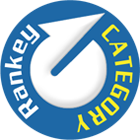
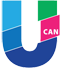

In [0]:
html = source_code.content
print(html)


**BeautifulSoup로 보기 쉬운 형태로 변환**

<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="No-Cache" http-equiv="Cache-Control"/>
<meta content="고려대학교 고파스" name="title">
<meta content="고려대학교 고파스" property="og:title">
<meta content="고대 재학생,졸업생이 함께하는 온라인 커뮤니티입니다." name="description">
<meta content="고대 재학생,졸업생이 함께하는 온라인 커뮤니티입니다." property="og:description">
<meta content="고려대,고대,민족고대,korea univ,고펑,고파스,koreapas" name="keywords"/>
<meta content="https://www.koreapas.com/bbs/koreapas_kakao4.png" property="og:image"/>
<link href="https://www.koreapas.com/bbs/koreapas_kakao4.png" rel="image_src"/>
<title>[고파스] 학생식당 식단정보</title>
<link hre
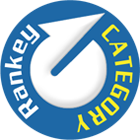
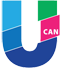

In [0]:
soup = BeautifulSoup(html, 'html.parser', from_encoding='utf-8')
print(soup)

**어디 학식을 가져올까?**

In [0]:
name = '학생회관'
print(name)

학생회관


**BeautifulSoup의 select 함수로 'ol' 태그 안의 'li' 태그 안의 내용을 불러옴**

In [0]:
part = soup.select('ol > li')
print(part)

[<li>
<span class="day">월</span>
<span class="date"><span>2</span>/<span>4</span></span>
<div class="menulist" contenteditable="false" style="border: 0px solid; box-sizing: border-box;">
<p> </p>
</div></li>, <li>
<span class="day">화</span>
<span class="date"><span>2</span>/<span>5</span></span>
<div class="menulist" contenteditable="false" style="border: 0px solid; box-sizing: border-box;">
<p> </p>
</div></li>, <li>
<span class="day">수</span>
<span class="date"><span>2</span>/<span>6</span></span>
<div class="menulist" contenteditable="false" style="border: 0px solid; box-sizing: border-box;">
<p> </p>
</div></li>, <li>
<span class="day">목</span>
<span class="date"><span>2</span>/<span>7</span></span>
<div class="menulist" contenteditable="false" style="border: 0px solid; box-sizing: border-box;">
<p style="background-color: transparent; color: rgb(64, 64, 64); font-family: 나눔 고딕; font-size: 17.33px; font-style: normal; font-variant: normal; font-weight: 600; letter-spacing: normal; 

**날짜는 따로 긁어오지 않아도 됨**

In [0]:
days = ['월', '화', '수', '목', '금', '토']
print(days)

['월', '화', '수', '목', '금', '토']


**메뉴를 담을 리스트 생성(가공 전)**

In [0]:
rawMenu = []
print(rawMenu)

[]


**반복문으로 처리**

In [0]:
# part 내에서 각각...
for i in part:
    # 요일, 날짜 빼고 식단만
    rawMenu_t = i.select('div > p')
    # 그걸 rawMenu에 저장
    rawMenu.append(rawMenu_t)
print(rawMenu)

[[<p> </p>], [<p> </p>], [<p> </p>], [<p style="background-color: transparent; color: rgb(64, 64, 64); font-family: 나눔 고딕; font-size: 17.33px; font-style: normal; font-variant: normal; font-weight: 600; letter-spacing: normal; line-height: 20.79px; margin-bottom: 0px; margin-left: 0px; margin-right: 0px; margin-top: 0px; orphans: 2; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; padding-top: 0px; text-align: left; text-decoration: none; text-indent: 0px; text-transform: none; -webkit-text-stroke-width: 0px; white-space: normal; word-spacing: 0px;"><span style="font-size: 16px;">Korea </span>-   <span style="font-size: 13.33px;">흑미밥/쌀밥 콩나물국 제육김치볶음 따끈따끈두부찜 어묵채조림 구이김*양념장                                           포기김치/깍두기</span></p>, <p style="background-color: transparent; color: rgb(64, 64, 64); font-family: 나눔 고딕; font-size: 17.33px; font-style: normal; font-variant: normal; font-weight: 600; letter-spacing: normal; line-height: 20.79px; margin-bottom: 0px; margin-left: 0px

**여러 개 중, 필요한 건 마지막 6개(학생회관이므로)**

In [0]:
rawMenu = rawMenu[-6:]
print(rawMenu)

[[<p>설날연휴    <br/></p>], [<p>설날<br/></p>], [<p>설날연휴<br/></p>], [<p>쌀밥&amp;잡곡밥<br/>부대찌개<br/>바싹불고기<br/>해쉬포테이토<br/>양배추쌈<br/>열무된장무침<br/>파래김<br/>배추김치<br/></p>], [<p>쌀밥&amp;잡곡밥<br/>계란순두부국<br/>닭볶음탕<br/>핫도그<br/>어묵볶음<br/>무초절이<br/>파래김<br/>배추김치<br/></p>], [<p>운영없음<br/></p>]]


**menu를 담을 List**

In [0]:
menuList = []
print(menuList)

[]


**rawMenu를 가공해서 menuList에 담음**

In [0]:
for foods in rawMenu:
    # 하루 마다의 메뉴를 담을 리스트
    menu = []
    # 태그 내의 text를 가져옴, [0]은 list type이라서 붙임
    for i in range(len(foods[0].contents)):
        # 짝수 번째 요소들만 뽑기
        if i%2 == 0:
            menu.append(foods[0].contents[i])
    # 하루의 메뉴를 메뉴 리스트에 붙임
    menuList.append(menu)
print(menuList)

[['설날연휴\xa0\xa0\xa0\xa0'], ['설날'], ['설날연휴'], ['쌀밥&잡곡밥', '부대찌개', '바싹불고기', '해쉬포테이토', '양배추쌈', '열무된장무침', '파래김', '배추김치'], ['쌀밥&잡곡밥', '계란순두부국', '닭볶음탕', '핫도그', '어묵볶음', '무초절이', '파래김', '배추김치'], ['운영없음']]


**메뉴판 생성(dictionary 타입)**

In [0]:
board = {}
print(board)

{}


**요일 별로 메뉴판에 담기**

In [0]:
for i in range(len(menuList)):
    board[days[i]] = menuList[i]
print(board)

{'월': ['설날연휴\xa0\xa0\xa0\xa0'], '화': ['설날'], '수': ['설날연휴'], '목': ['쌀밥&잡곡밥', '부대찌개', '바싹불고기', '해쉬포테이토', '양배추쌈', '열무된장무침', '파래김', '배추김치'], '금': ['쌀밥&잡곡밥', '계란순두부국', '닭볶음탕', '핫도그', '어묵볶음', '무초절이', '파래김', '배추김치'], '토': ['운영없음']}


무슨 요일?

In [0]:
day = '금'
print(day)

금


**메뉴판을 출력**

In [0]:
print(' _________________________')
print('|     %s %s요일 메뉴     |' %(name, day))
print('|_________________________|')
for food in board[day]:
    print(' %13s ' %(food))

 _________________________
|     학생회관 금요일 메뉴     |
|_________________________|
        쌀밥&잡곡밥 
        계란순두부국 
          닭볶음탕 
           핫도그 
          어묵볶음 
          무초절이 
           파래김 
          배추김치 
